CCC: -0.02025, rho: -0.05961, R2: -1.44913


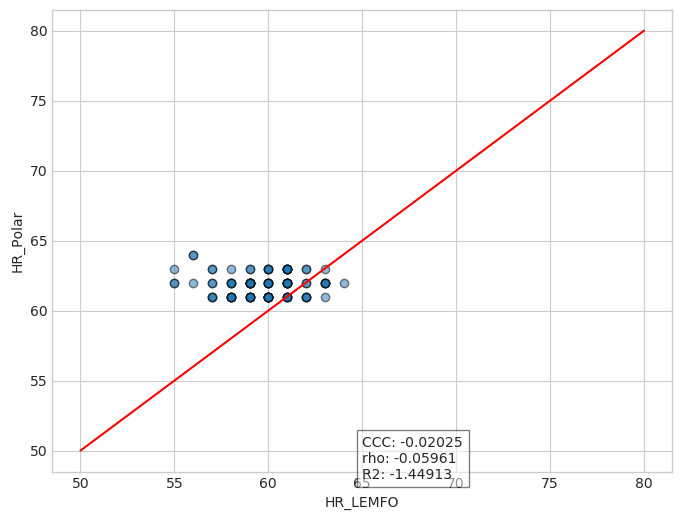

In [34]:
#Esta clase calcula Lin’s Concordance Correlation Coefficient (CCC) 
#which is a method for comparing two measurements of the same variable

import numpy as np
from numpy.random import default_rng
import pandas as pd   
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#IMPORT DATA
dataset = pd.read_csv(r"PRUEBA2.csv",sep=';')


#SENSOR READINGS
X = dataset['HR_Lemfo'].values
Y = dataset['HR_Polar_H10'].values


def ccc(x,y):
    ''' Concordance Correlation Coefficient'''
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rhoc = 2*sxy / (np.var(x) + np.var(y) + (x.mean() - y.mean())**2)
    return rhoc


def r(x,y):
    ''' Pearson Correlation Coefficient'''
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rho = sxy / (np.std(x)*np.std(y))
    return rho

print("CCC: %5.5f, rho: %5.5f, R2: %5.5f"%(ccc(X,Y), r(X,Y), r2_score(X, Y)))


with plt.style.context(('seaborn-whitegrid')):
    plt.figure(figsize=(8,6))
    
    # Scatter plot of X vs Y
    plt.scatter(X,Y,edgecolors='k',alpha=0.5)
    
    # Plot of the 45 degree line
    plt.plot([50,80],[50,80],'r')
      
    plt.text(65, 0.75*Y.max(), "CCC: %5.5f"%(ccc(X,Y))+"\nrho: %5.5f"%(r(X,Y))+"\nR2: %5.5f"%(r2_score(X, Y)),\
             fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
   # plt.text(0.8, 0.1, "$\sigma=$ %5.3f"%(sigma)+"\nTilt = %5.3f"%(tilt),\
   #          fontsize=16, bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('HR_LEMFO',fontsize=10)
    plt.ylabel('HR_Polar',fontsize=10)
    
    plt.show()